In [1]:
import pandas as pd
import numpy as np
import psycopg2
import psycopg2.extras

In [1]:
pip install scikit-learn


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\bg\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ncdw",
                                           user = "postgres",
                                           password = "sultanmahmud22",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [12]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = '''
SELECT t.pik
     , time.year
     , time.month
     , time.day
     , attr.unit
     , lab.lab_name
     , t.test_result
     , i.test_name
FROM centraldw.fact_testresult t
JOIN centraldw.dim_testitem i on i.test_key = t.test_key
JOIN centraldw.dim_time time on time.time_key = t.time_key
JOIN centraldw.dim_lab lab on lab.lab_key = t.lab_key
JOIN centraldw.dim_attribute attr on attr.attr_key = t.attr_key
JOIN centraldw.dim_refresult ref on ref.refresult_key = t.refresult_key

GROUP BY t.pik , time.year, time.month,time.day, attr.unit,lab.lab_name, t.test_result,i.test_name

'''
cur.execute(select_stmt)
records = cur.fetchall()
records
df = pd.DataFrame(list(records), columns = ['PIK',  'year', 'month','day','unit', 'lab_name', 'test_result', 'test_name'])
df

successfully connected to database


,PIK,year,month,day,unit,lab_name,test_result,test_name
0,F1926jvorfrrglahvcrnouosvspqsp,2019,7,8,/LPF,Clinical Pathology,Nil,Complete Urine Analysis (Urine R/E)
1,F1926jvorfrrglahvcrnouosvspqsp,2019,7,8,?g/dL,Biochemistry,282,Total Iron Binding Capacity (TIBC) Blood
2,F1926jvorfrrglahvcrnouosvspqsp,2019,7,8,?g/dL,Biochemistry,44.4,Iron Serum
3,F1926jvorfrrglahvcrnouosvspqsp,2019,7,8,gm/L,Biochemistry,35,Albumin Serum
4,F1926jvorfrrglahvcrnouosvspqsp,2019,7,8,IU/mL,Immunology,1.53,TSH
...,...,...,...,...,...,...,...,...
471333,M2018xwrrefhpplrnounruupuws,2019,9,11,Null,Immunology,Negative,Dengue Ag NS1 (ICT)
471334,M2018xwrrefhpplrnounruupuws,2019,9,11,pg,Haematology,26.4,CBC
471335,M2018xwrrefhpplrnounruupuws,2019,9,11,X 10^12/L,Haematology,4.21,CBC
471336,M2018xwrrefhpplrnounruupuws,2019,9,11,X 10^9/L,Haematology,12.5,CBC


In [4]:
df.corr(method='kendall')

D:\myenv\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,year,month,day
year,1.000000,-0.500531,-0.005173
month,-0.500531,1.000000,-0.000091
day,-0.005173,-0.000091,1.000000


In [5]:
df.corr(method ='pearson')

,year,month,day
year,1.000000,-0.591748,-0.003043
month,-0.591748,1.000000,0.000045
day,-0.003043,0.000045,1.000000


In [6]:
df['test_result']=df['test_result'].astype('category').cat.codes
df['test_name']=df['test_name'].astype('category').cat.codes
df.corr()


,year,month,day,test_result,test_name
year,1.000000,-0.591748,-0.003043,-0.003464,-0.040992
month,-0.591748,1.000000,0.000045,0.001487,-0.027420
day,-0.003043,0.000045,1.000000,0.001359,-0.008023
test_result,-0.003464,0.001487,0.001359,1.000000,0.009668
test_name,-0.040992,-0.027420,-0.008023,0.009668,1.000000


In [7]:
df.corr(method ='kendall')

D:\myenv\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,year,month,day,test_result,test_name
year,1.000000,-0.500531,-0.005173,-0.003762,-0.001648
month,-0.500531,1.000000,-0.000091,0.001730,-0.021112
day,-0.005173,-0.000091,1.000000,0.000637,0.001610
test_result,-0.003762,0.001730,0.000637,1.000000,-0.001145
test_name,-0.001648,-0.021112,0.001610,-0.001145,1.000000


In [8]:
matrix = df.corr().round(3)
print(matrix)

              year  month    day  test_result  test_name
year         1.000 -0.592 -0.003       -0.003     -0.041
month       -0.592  1.000  0.000        0.001     -0.027
day         -0.003  0.000  1.000        0.001     -0.008
test_result -0.003  0.001  0.001        1.000      0.010
test_name   -0.041 -0.027 -0.008        0.010      1.000


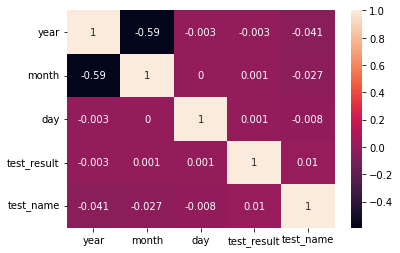

In [9]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr().round(3)
sns.heatmap(matrix, annot=True)
plt.show()

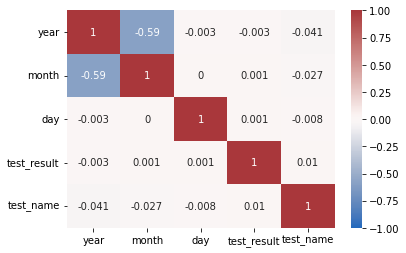

In [10]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr().round(3)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [4]:
import random
from deap import base, creator, tools

In [5]:
# Define problem variables
num_nodes = 4
attributes = ['age', 'gender', 'diagnosis', 'treatment']

In [6]:
# Define fitness function
def fitness(partition):
    # Compute fitness based on objectives
    communication_cost = sum(len(set(partition[node])) for node in range(num_nodes))
    parallelism = max(len(partition[node]) for node in range(num_nodes))
    query_response_time = max(len(partition[node]) / parallelism for node in range(num_nodes))
    return communication_cost, query_response_time,


In [7]:
# Define genetic operators
toolbox = base.Toolbox()

In [8]:
def partition_random():
    # Generate a random partition
    return [random.choice(range(num_nodes)) for _ in attributes]

In [9]:
def partition_crossover(partition1, partition2):
    # Perform single-point crossover on partitions
    point = random.choice(range(len(attributes)))
    return partition1[:point] + partition2[point:],

In [10]:
def partition_mutation(partition):
    # Mutate a partition by randomly reassigning an attribute
    index = random.choice(range(len(attributes)))
    partition[index] = random.choice(range(num_nodes))
    return partition,

In [11]:
# Register genetic operators
creator.create('FitnessMax', base.Fitness, weights=(-1.0, -1.0))
creator.create('Individual', list, fitness=creator.FitnessMax)
toolbox.register('partition', partition_random)
toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.partition)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', fitness)
toolbox.register('mate', partition_crossover)
toolbox.register('mutate', partition_mutation)
toolbox.register('select', tools.selNSGA2)

In [12]:
# Define parameters
pop_size = 100
cx_prob = 0.5
mut_prob = 0.1
num_gens = 50

In [13]:
# Initialize population
pop = toolbox.population(n=pop_size)